<a target="_blank" href="https://colab.research.google.com/github/jgromero/dasoc-ap/blob/main/dogsVScats/dogsVScats-transferencia.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
</a>

# Clasificación con _perros y gatos_

Ejemplo basado en _Deep Learning with Python (2nd edition)_, capítulo 8.

## Descargar datos

Descargar y descomprimir [fichero de datos](https://drive.google.com/open?id=1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b&usp=drive_fs).

In [ ]:
import os
import zipfile

if not os.path.exists('cats_and_dogs_small'):
    !gdown 1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b

    with zipfile.ZipFile('cats_and_dogs_small.zip', 'r') as zip_ref:
        zip_ref.extractall()

    folders = os.listdir('cats_and_dogs_small')
    print(folders)

Configurar directorios.

In [ ]:
train_dir      = './cats_and_dogs_small/train/'
validation_dir = './cats_and_dogs_small/validation/'
test_dir       = './cats_and_dogs_small/test/'

Revisar imágenes.

(-0.5, 311.5, 395.5, -0.5)

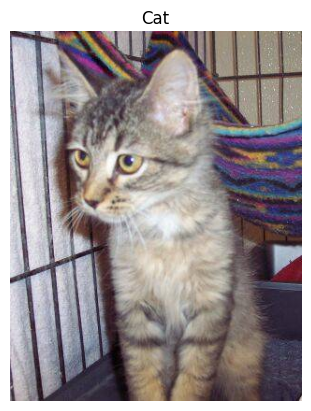

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(train_dir + 'cats/cat.2.jpg')
plt.imshow(img)
plt.title('Cat')
plt.axis('off')


## Entrenar CNN para clasificación

### Definir componentes para la carga de imágenes

Definir conjuntos de datos (_dataset from directory_).

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    directory=validation_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

Found 4000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Definir la arquitectura de la red neuronal

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.build(input_shape=(None, (150, 150, 3)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenar la red neuronal

Configurar entrenamiento.

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Entrenar.

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset
)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.5117 - loss: 12.7197 - val_accuracy: 0.5700 - val_loss: 0.6791
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.6149 - loss: 0.6523 - val_accuracy: 0.5840 - val_loss: 0.6928
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6895 - loss: 0.5873 - val_accuracy: 0.5960 - val_loss: 0.7031
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7186 - loss: 0.5389 - val_accuracy: 0.6270 - val_loss: 0.7192
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7934 - loss: 0.4447 - val_accuracy: 0.6450 - val_loss: 0.7074
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.8142 - loss: 0.3790 - val_accuracy: 0.6500 - val_loss: 0.8640
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8534 - loss: 0.3317 - val_accuracy: 0.6710 - val_loss: 0.9543
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9065 - loss: 0.2214 - va

Observar convergencia del modelo.

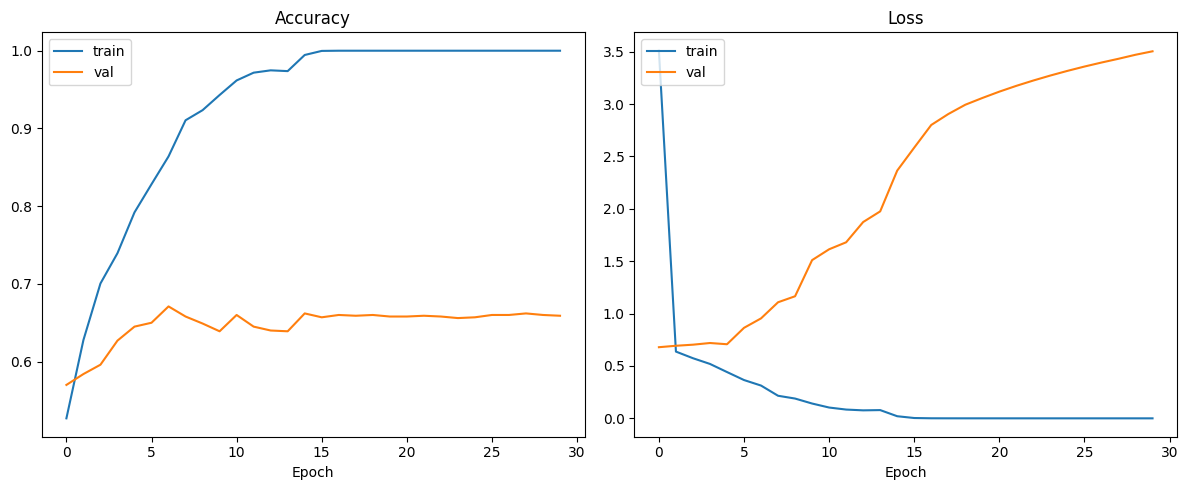

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Calcular métricas con conjunto de test

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6544 - loss: 3.8948
Test Loss: 3.7893643379211426
Test Accuracy: 0.6535000205039978


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


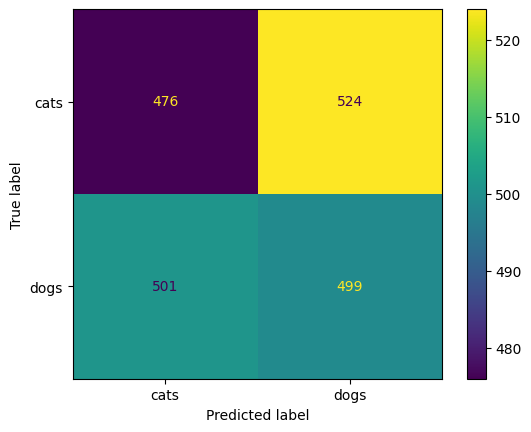

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Obtener clase real de cada instancia del conjunto de test
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Realizar predicción
y_pred = model.predict(test_dataset)

# Convertir predicciones en [0, 1] a {0, 1} - umbral 0.5
y_pred_classes = (y_pred > 0.5).astype(float)

# Calcular y mostrar matriz de contingencia
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.class_names)
disp.plot()

## Aumento de datos

Añadir capas de aumento de datos basadas en transformaciones de las imágenes: [`RandomFlip`](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_flip/), [`RandomRotation`](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_rotation/), [`RandomZoom`](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_zoom/).

Se pueden encontrar más capas de aumento para imágenes [aquí](https://keras.io/api/layers/preprocessing_layers/image_augmentation/).

In [ ]:
model = models.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.5195 - loss: 17.1955 - val_accuracy: 0.5050 - val_loss: 0.6935
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.5390 - loss: 0.6860 - val_accuracy: 0.5660 - val_loss: 0.6865
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.5632 - loss: 0.6836 - val_accuracy: 0.5890 - val_loss: 0.6691
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.5741 - loss: 0.6881 - val_accuracy: 0.6010 - val_loss: 0.6606
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.6168 - loss: 0.6565 - val_accuracy: 0.6170 - val_loss: 0.6591
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.6414 - loss: 0.6400 - val_accuracy: 0.6440 - val_loss: 0.6399
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.6421 - loss: 0.6359 - val_accuracy: 0.5100 - val_loss: 0.6907
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.5746 - loss: 0.6588

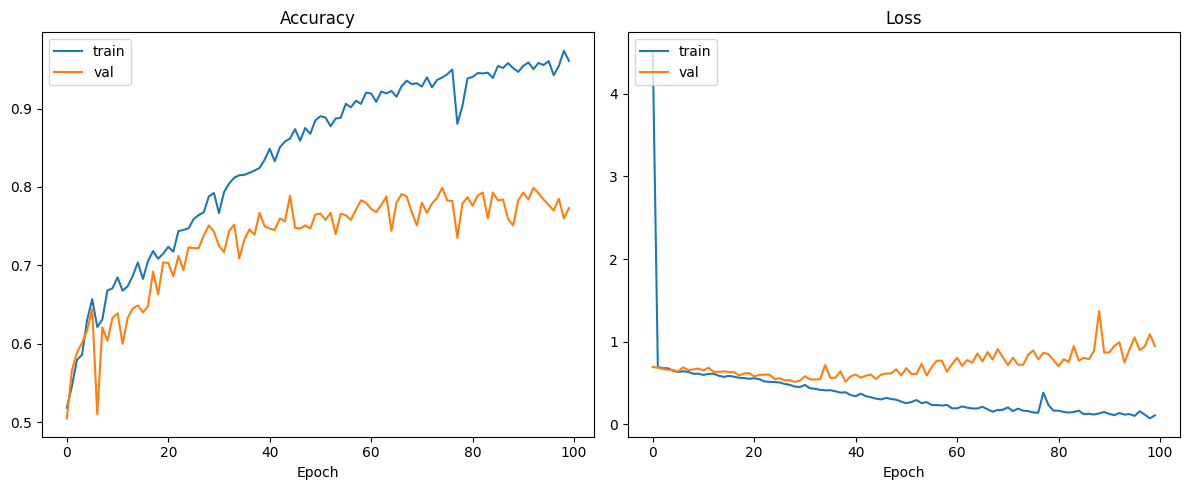

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

## _Early stopping_

El soporte para _early stopping_ se realiza mediante el _callback_ [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/). 

Un _callback_ es un "conector" donde se pueden "enchufar" diferentes funcionalidades, normalmente ya predefinidas, para que recojan información o modifiquen la forma en que se realiza el `fit`. Así, los _callbacks_ permiten cierta interacción con el `fit` en algunos pasos del proceso.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9536 - loss: 0.2385 - val_accuracy: 0.7910 - val_loss: 1.1967
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9593 - loss: 0.1249 - val_accuracy: 0.7780 - val_loss: 1.1151
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9584 - loss: 0.1317 - val_accuracy: 0.7730 - val_loss: 1.2234
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9572 - loss: 0.1386 - val_accuracy: 0.7740 - val_loss: 1.0027
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9581 - loss: 0.1010 - val_accuracy: 0.7820 - val_loss: 1.0037
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9601 - loss: 0.1068 - val_accuracy: 0.7930 - val_loss: 1.0460
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9615 - loss: 0.1119 - val_accuracy: 0.7610 - val_loss: 1.0361
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9408 - loss: 0.1506 

Se pueden añadir varios _callbacks_ a la ejecución. Por ejemplo, se puede incluir el [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) para guardar el mejor modelo encontrado durante todo el entrenamiento, con sus pesos asociados, según la métrica seleccionada.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath="convnet_dogsVScats.keras",
    save_best_only=True,
    monitor="val_loss"
)

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.9605 - loss: 0.1243 - val_accuracy: 0.8100 - val_loss: 0.9561
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.9669 - loss: 0.1018 - val_accuracy: 0.7940 - val_loss: 0.9482
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9546 - loss: 0.1378 - val_accuracy: 0.7760 - val_loss: 1.1253
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9666 - loss: 0.0980 - val_accuracy: 0.7900 - val_loss: 1.1846
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9590 - loss: 0.1069 - val_accuracy: 0.7930 - val_loss: 1.1037
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9541 - loss: 0.1532 - val_accuracy: 0.7960 - val_loss: 1.0811
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9730 - loss: 0.0763 - val_accuracy: 0.7810 - val_loss: 1.1721


## Regularización, normalización y _dropout_

Finalmente, podemos incorporar varias mejoras centradas en la modificación del proceso de aprendizaje.

In [ ]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, (150, 150, 3)))
model.summary()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath="convnet_dogsVScats.keras",
    save_best_only=True,
    monitor="val_loss"
)

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

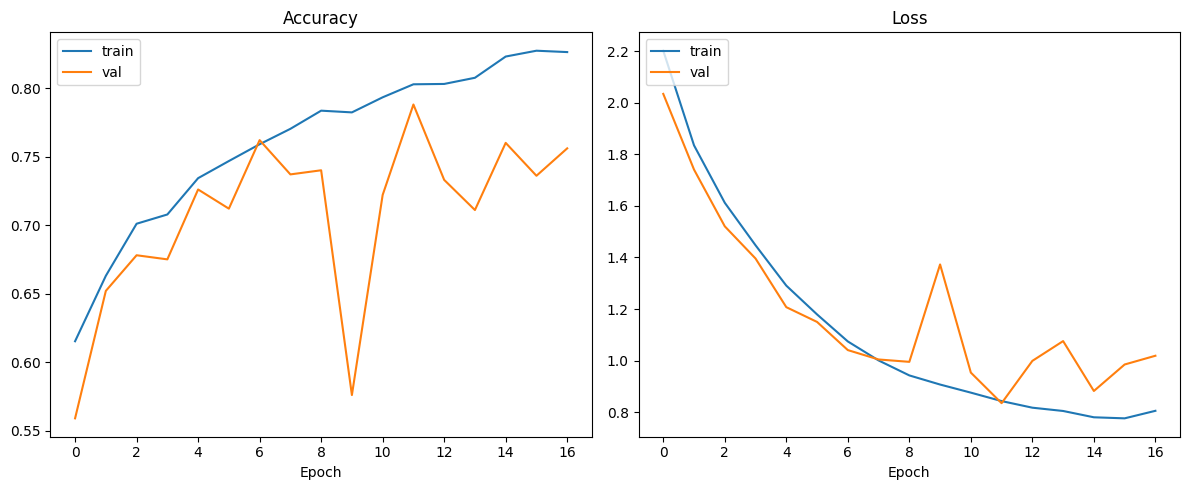

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Ejercicio (1 punto extra - trabajo de ampliación)

*   Define y entrena una red neuronal combinando las mejoras de aprendizaje anteriores.
*   Calcula la métrica de _accuracy_ y la matriz de contingencia para el subconjunto de test.
